In [50]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
COLUMNS = ['date','device','hive number','hive humidity','hive temp','weather temp','weather humidity','queen presence']

In [96]:
CURRENT_PATH = os.getcwd()
DATA_DIR = os.path.join(CURRENT_PATH,'Data')
DATA_FILE = os.path.join(DATA_DIR,'All-Data-Updated.csv')
PREPROCESSED_DIR = os.path.join(CURRENT_PATH,'Preprocessed')

In [97]:
df = pd.read_csv(DATA_FILE)
df.describe()


device  hive number    hive temp  hive humidity  hive pressure  \
count  1275.000000  1275.000000  1275.000000    1275.000000    1275.000000   
mean      1.554510     2.709020    29.009475      44.663890    1009.179169   
std       0.497215     1.488587     8.172418      18.359731       2.406004   
min       1.000000     1.000000    15.500000       7.230000    1003.540000   
25%       1.000000     1.000000    22.455000      32.245000    1007.375000   
50%       2.000000     3.000000    27.910000      42.180000    1009.170000   
75%       2.000000     4.000000    33.075000      54.945000    1010.705000   
max       2.000000     5.000000    55.620000      93.470000    1015.970000   

       weather temp  weather humidity  weather pressure   wind speed  \
count   1271.000000       1275.000000       1275.000000  1271.000000   
mean      20.326845         63.501176       1011.370196     3.805452   
std        5.587868         16.207222         56.807873     2.311196   
min       10.750000          0.000000          0.000000     0.000000   
25%       15.480000         51.000000       1013.000000     2.060000   
50%       19.280000         66.000000       1014.000000     3.600000   
75%       24.850000         78.000000       1016.000000     5.660000   
max       35.430000         88.000000       1021.000000    10.800000   

       gust speed  ...  cloud coverage    rain           lat     long  \
count  281.000000  ...     1275.000000  1275.0  1.271000e+03  1271.00   
mean     4.511317  ...       27.868235     0.0  3.729000e+01  -121.95   
std      3.931787  ...       33.641333     0.0  7.108224e-15     0.00   
min      0.450000  ...        0.000000     0.0  3.729000e+01  -121.95   
25%      1.340000  ...        0.000000     0.0  3.729000e+01  -121.95   
50%      2.680000  ...       20.000000     0.0  3.729000e+01  -121.95   
75%      7.600000  ...       40.000000     0.0  3.729000e+01  -121.95   
max     15.430000  ...      100.000000     0.0  3.729000e+01  -121.95   

       queen presence  queen acceptance      frames       target         time  \
count     1275.000000       1275.000000  1275.00000  1275.000000  1275.000000   
mean         0.876078          1.549020     9.10902     3.396863     0.482972   
std          0.329621          0.704151     0.99443     1.586142     0.287396   
min          0.000000          0.000000     8.00000     0.000000     0.000000   
25%          1.000000          1.000000     8.00000     3.000000     0.250000   
50%          1.000000          2.000000    10.00000     3.000000     0.500000   
75%          1.000000          2.000000    10.00000     5.000000     0.750000   
max          1.000000          2.000000    10.00000     5.000000     0.958000   

       queen status  
count   1275.000000  
mean       2.127843  
std        1.096649  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        3.000000  
max        3.000000  

[8 rows x 21 columns]

In [98]:
df.head()

device  hive number                 date  hive temp  hive humidity  \
0       1            5  2022-06-08 14:52:28      36.42          30.29   
1       1            5  2022-06-08 15:51:41      33.56          33.98   
2       1            5  2022-06-08 17:21:53      29.01          42.73   
3       1            5  2022-06-08 18:20:59      30.51          36.74   
4       1            5  2022-06-08 19:20:04      30.32          35.55   

   hive pressure  weather temp  weather humidity  weather pressure  \
0        1007.45         26.68                52              1013   
1        1006.93         25.99                53              1012   
2        1006.68         24.49                56              1012   
3        1006.68         22.97                59              1012   
4        1006.58         21.52                61              1012   

   wind speed  ...  rain    lat    long                   file name  \
0        8.75  ...     0  37.29 -121.95  2022-06-08--14-52-28_1.raw   
1       10.29  ...     0  37.29 -121.95  2022-06-08--15-51-41_1.raw   
2        8.75  ...     0  37.29 -121.95  2022-06-08--17-21-53_1.raw   
3        8.23  ...     0  37.29 -121.95  2022-06-08--18-20-59_1.raw   
4        7.20  ...     0  37.29 -121.95  2022-06-08--19-20-04_1.raw   

   queen presence  queen acceptance frames  target   time  queen status  
0               1                 2      8       0  0.583             0  
1               1                 2      8       0  0.625             0  
2               0                 0      8       1  0.708             1  
3               0                 0      8       1  0.750             1  
4               0                 0      8       1  0.792             1  

[5 rows x 23 columns]

In [99]:
df = df[COLUMNS]
df.describe()

device  hive number  hive humidity    hive temp  weather temp  \
count  1275.000000  1275.000000    1275.000000  1275.000000   1271.000000   
mean      1.554510     2.709020      44.663890    29.009475     20.326845   
std       0.497215     1.488587      18.359731     8.172418      5.587868   
min       1.000000     1.000000       7.230000    15.500000     10.750000   
25%       1.000000     1.000000      32.245000    22.455000     15.480000   
50%       2.000000     3.000000      42.180000    27.910000     19.280000   
75%       2.000000     4.000000      54.945000    33.075000     24.850000   
max       2.000000     5.000000      93.470000    55.620000     35.430000   

       weather humidity  queen presence  
count       1275.000000     1275.000000  
mean          63.501176        0.876078  
std           16.207222        0.329621  
min            0.000000        0.000000  
25%           51.000000        1.000000  
50%           66.000000        1.000000  
75%           78.000000        1.000000  
max           88.000000        1.000000

In [100]:
df_group_by_device = df.groupby('device')
for device, group in df_group_by_device:
    print(f"Device: {device} have {len(group)} rows")

Device: 1 have 568 rows
Device: 2 have 707 rows


In [101]:
os.makedirs(PREPROCESSED_DIR,exist_ok=True)

for device, group in df_group_by_device:

    device_dir = os.path.join(PREPROCESSED_DIR,str(device))
    os.makedirs(device_dir,exist_ok=True)
    df_group_by_hive = group.groupby('hive number')

    for hive,group_ in df_group_by_hive:
        
        print(f"Device: {device} Hive: {hive} have {len(group_)} rows")
        group_.to_csv(os.path.join(device_dir,f"{hive}.csv"),index=False)




Device: 1 Hive: 4 have 471 rows
Device: 1 Hive: 5 have 97 rows
Device: 2 Hive: 1 have 518 rows
Device: 2 Hive: 3 have 189 rows


In [102]:
def get_path_for_csvs():
    paths = []
    devices = os.listdir(PREPROCESSED_DIR)
    for device in devices:
        hives = os.listdir(os.path.join(PREPROCESSED_DIR,device))
        for hive in hives:
            paths.append(os.path.join(PREPROCESSED_DIR,device,hive))

    return paths

paths = get_path_for_csvs()


In [103]:
datasets = []
for path in paths:
    df = pd.read_csv(path)
    datasets.append(df)

def sort_by_date(df:pd.DataFrame)->pd.DataFrame:
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date',ignore_index=True)
    return df

def sort_by_date_and_time(df:pd.DataFrame)->pd.DataFrame:
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['time'] = df['date'].dt.time
    df = df.sort_values(by=['day','time'],ignore_index=True)
    return df

def check_weather_data_samples_are_missing(df:pd.DataFrame)->None:
    threshold = pd.Timedelta(hours=1, minutes=20)
    df['time-diff'] = df['date'].diff()
    missing_data = df[df['time-diff'] > threshold]
    if not missing_data.empty:
        print(f"Large time gaps detected in the data")
        print(missing_data[['time', 'time-diff']])
    else:
        print("No large time gaps detected in the data")

def chunk_by_time_threshold(df: pd.DataFrame, threshold: pd.Timedelta, min_chunk_size: int = 24) -> list:
    chunks = []
    chunk = []
    
    for i in range(1, len(df)):
        time_diff = df['date'].iloc[i] - df['date'].iloc[i - 1]
        
        if time_diff > threshold:
            # If time difference is greater than threshold, finalize the current chunk
            if len(chunk) >= min_chunk_size:
                chunks.append(pd.DataFrame(chunk))  # Add chunk only if it has at least 24 rows
            chunk = []  # Reset the chunk
        
        # Add the current row to the chunk
        chunk.append(df.iloc[i])

    # Add the last chunk if it exists and has at least 24 rows
    if len(chunk) >= min_chunk_size:
        chunks.append(pd.DataFrame(chunk))
    
    return chunks

datasets = [sort_by_date_and_time(df) for df in datasets]
for df,path in zip(datasets,paths):
    print(f"Checking for missing data in {path}")
    chunks = chunk_by_time_threshold(df, pd.Timedelta(hours=1, minutes=20), min_chunk_size=24)
    for i, chunk in enumerate(chunks):
        folder_path = os.path.join(path.split(".")[0],'chunks')
        print(folder_path)
        os.makedirs(folder_path,exist_ok=True)
        chunk.to_csv(f"{folder_path}/chunck-{i}.csv", index=False)
        print(f"Chunk {i} has {len(chunk)} rows")

Checking for missing data in /Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/Preprocessed/1/5.csv
/Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/Preprocessed/1/5/chunks
Chunk 0 has 25 rows
/Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/Preprocessed/1/5/chunks
Chunk 1 has 25 rows
Checking for missing data in /Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/Preprocessed/1/4.csv
/Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/Preprocessed/1/4/chunks
Chunk 0 has 198 rows
/Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/Preprocessed/1/4/chunks
Chunk 1 has 113 rows
/Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/Preprocessed/1/4/chunks
Chunk 2 has 76 rows
Checking for missing data in /Users/yasantha-mac/projects/IntelliBee/Data-Collecting-Device/Available-Dataset/P

In [112]:
chunks = []
for dataset in datasets:
    chunks += chunk_by_time_threshold(dataset, pd.Timedelta(hours=1, minutes=20), min_chunk_size=24)
for i, chunk in enumerate(chunks):
    print(f"Chunk {i} has {len(chunk)} rows")

chunk_0 = chunks[0]

def split_by_queen_presence(chunk):
    """Splits a chunk into sub-chunks based on changes in queen presence."""
    chunks_with_same_queen_status = []
    sub_chunk = [chunk.iloc[0]]  # Start a new sub-chunk with the first row

    for i in range(1, len(chunk)):
        if chunk['queen presence'].iloc[i] != chunk['queen presence'].iloc[i - 1]:
            # Queen presence changed, finalize the current sub-chunk and start a new one
            chunks_with_same_queen_status.append(pd.DataFrame(sub_chunk))
            sub_chunk = []
        sub_chunk.append(chunk.iloc[i])
    
    # Append the last sub-chunk if it exists
    if sub_chunk:
        chunks_with_same_queen_status.append(pd.DataFrame(sub_chunk))
    
    return chunks_with_same_queen_status

chunks_queen_presence = []
chunks_no_queen_presence = []

for dataset in datasets:
    # First, split the dataset into time-based chunks
    chunks = chunk_by_time_threshold(dataset, pd.Timedelta(hours=1, minutes=20), min_chunk_size=24)
    
    for chunk in chunks:
        # Split the chunk further based on queen presence
        queen_based_chunks = split_by_queen_presence(chunk)
        
        # Sort each sub-chunk into the correct list based on the queen presence
        for sub_chunk in queen_based_chunks:
            if sub_chunk['queen presence'].iloc[0] == 1:
                chunks_queen_presence.append(sub_chunk)
            else:
                chunks_no_queen_presence.append(sub_chunk)

print(f"Chunks with queen presence: {len(chunks_queen_presence)}")
print(f"Chunks without queen presence: {len(chunks_no_queen_presence)}")
for chunk in chunks_no_queen_presence:
    print(f"Size of chunk {len(chunk)}")

Chunk 0 has 25 rows
Chunk 1 has 25 rows
Chunk 2 has 198 rows
Chunk 3 has 113 rows
Chunk 4 has 76 rows
Chunk 5 has 254 rows
Chunk 6 has 38 rows
Chunk 7 has 34 rows
Chunk 8 has 29 rows
Chunk 9 has 76 rows
Chunk 10 has 49 rows
Chunk 11 has 65 rows
Chunk 12 has 25 rows
Chunk 13 has 96 rows
Chunks with queen presence: 12
Chunks without queen presence: 4
Size of chunk 25
Size of chunk 53
Size of chunk 53
Size of chunk 25


Mean of EMA Difference: 9.77557393167537
Standard Deviation of EMA Difference: 1.2493564363687588
Variance of EMA Difference: 1.5608915050960444


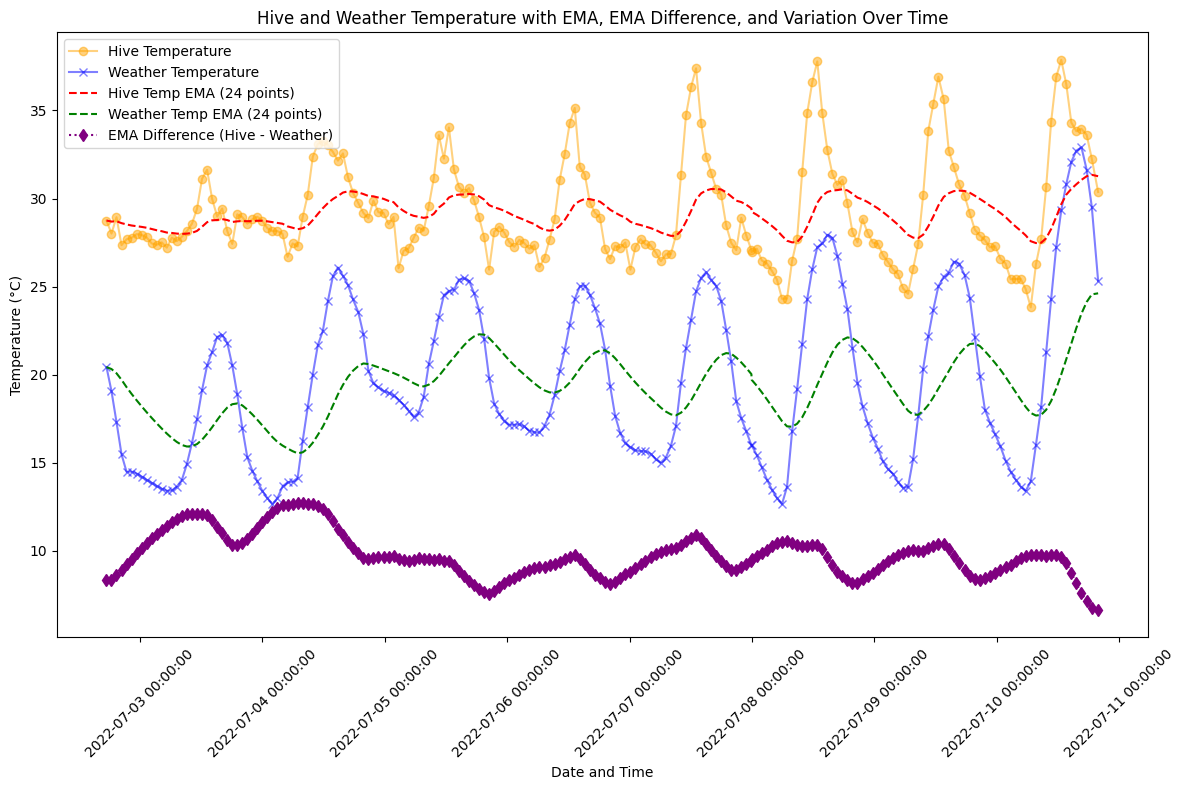

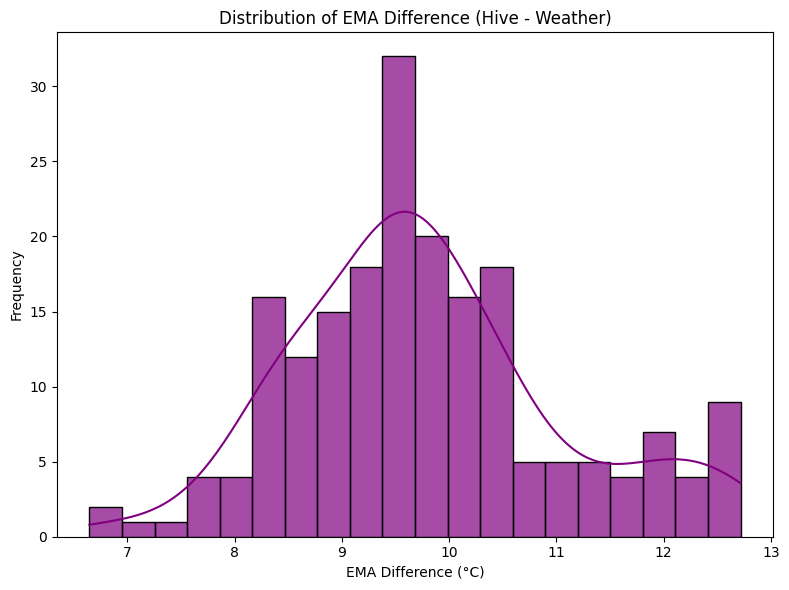

In [76]:
import matplotlib.dates as mdates
import seaborn as sns

if all(col in chunk_0.columns for col in COLUMNS):
    plt.figure(figsize=(12, 8))

    # Calculate EMA for both hive temp and weather temp using 24 data points
    chunk_0['hive_temp_ema'] = chunk_0['hive temp'].ewm(span=24, adjust=False).mean()
    chunk_0['weather_temp_ema'] = chunk_0['weather temp'].ewm(span=24, adjust=False).mean()

    # Calculate the difference between the two EMAs
    chunk_0['ema_difference'] = chunk_0['hive_temp_ema'] - chunk_0['weather_temp_ema']

    # Calculate statistics for the EMA difference
    mean_diff = chunk_0['ema_difference'].mean()
    std_diff = chunk_0['ema_difference'].std()
    var_diff = chunk_0['ema_difference'].var()

    print(f"Mean of EMA Difference: {mean_diff}")
    print(f"Standard Deviation of EMA Difference: {std_diff}")
    print(f"Variance of EMA Difference: {var_diff}")

    # Plot hive temperature, weather temperature, their EMAs, and the EMA difference
    plt.plot(chunk_0['date'], chunk_0['hive temp'], label='Hive Temperature', color='orange', marker='o', alpha=0.5)
    plt.plot(chunk_0['date'], chunk_0['weather temp'], label='Weather Temperature', color='blue', marker='x', alpha=0.5)
    plt.plot(chunk_0['date'], chunk_0['hive_temp_ema'], label='Hive Temp EMA (24 points)', color='red', linestyle='--')
    plt.plot(chunk_0['date'], chunk_0['weather_temp_ema'], label='Weather Temp EMA (24 points)', color='green', linestyle='--')
    plt.plot(chunk_0['date'], chunk_0['ema_difference'], label='EMA Difference (Hive - Weather)', color='purple', linestyle=':', marker='d')

    # Adding labels and title
    plt.xlabel('Date and Time')
    plt.ylabel('Temperature (°C)')
    plt.title('Hive and Weather Temperature with EMA, EMA Difference, and Variation Over Time')

    # Format the x-axis to show both date and time
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)

    # Display the legend
    plt.legend()

    # Show the temperature plot
    plt.tight_layout()
    plt.show()

    # Plot the distribution of EMA difference
    plt.figure(figsize=(8, 6))
    sns.histplot(chunk_0['ema_difference'], bins=20, kde=True, color='purple', alpha=0.7)
    plt.title('Distribution of EMA Difference (Hive - Weather)')
    plt.xlabel('EMA Difference (°C)')
    plt.ylabel('Frequency')

    # Show the distribution plot
    plt.tight_layout()
    plt.show()

else:
    print("One or more required columns are missing in chunk_0.")

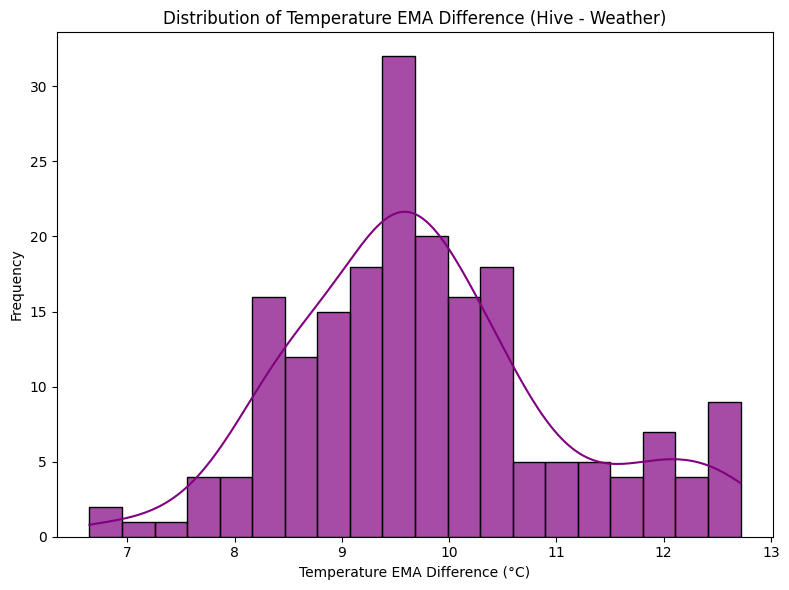

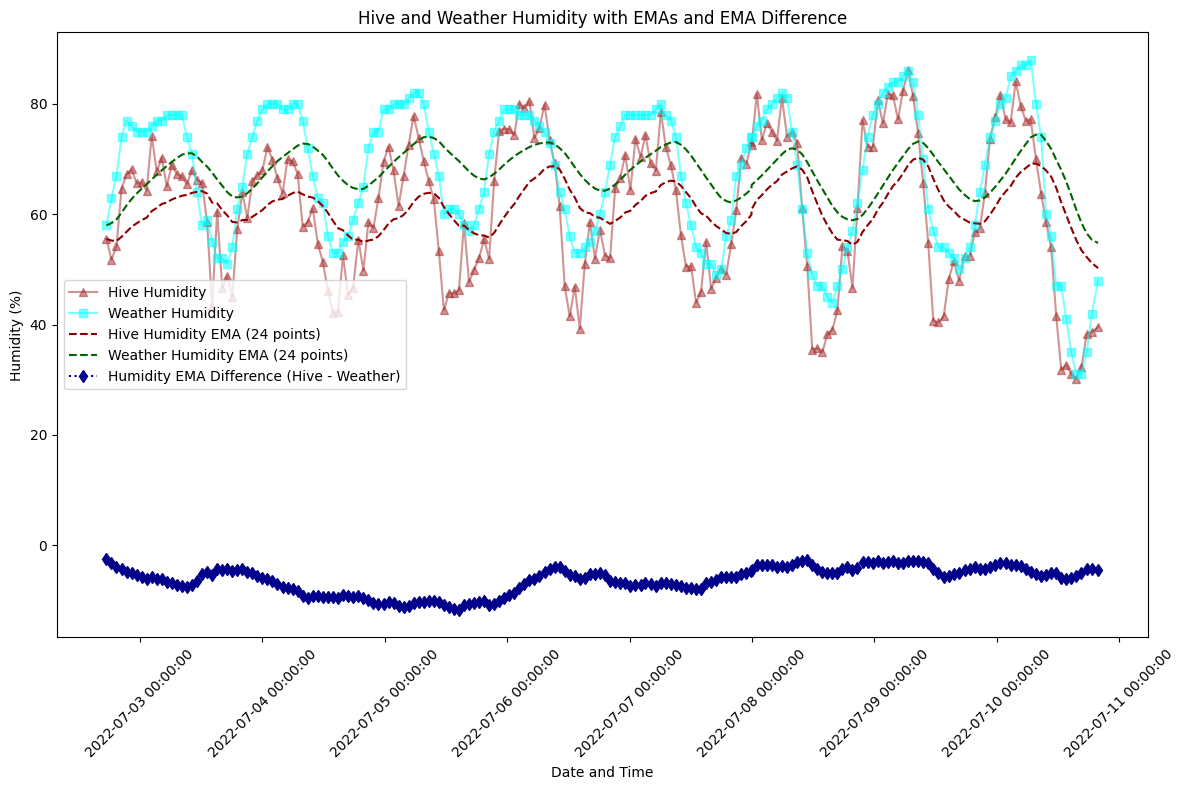

In [79]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Ensure the chunk has the required columns, including 'date'
COLUMNS = ['date', 'device', 'hive number', 'hive humidity', 'hive temp', 'weather temp', 'weather humidity']

# Check if all required columns are present in the chunk
if all(col in chunk_0.columns for col in COLUMNS):
    # ----- Plot for Temperature -----
    plt.figure(figsize=(12, 8))

    # Calculate EMA for both hive temp and weather temp using 24 data points
    chunk_0['hive_temp_ema'] = chunk_0['hive temp'].ewm(span=24, adjust=False).mean()
    chunk_0['weather_temp_ema'] = chunk_0['weather temp'].ewm(span=24, adjust=False).mean()

    # Calculate the difference between the two EMAs for temperature
    chunk_0['temp_ema_difference'] = chunk_0['hive_temp_ema'] - chunk_0['weather_temp_ema']

    # Plot hive and weather temperature, their EMAs, and the EMA difference
    plt.plot(chunk_0['date'], chunk_0['hive temp'], label='Hive Temperature', color='orange', marker='o', alpha=0.5)
    plt.plot(chunk_0['date'], chunk_0['weather temp'], label='Weather Temperature', color='blue', marker='x', alpha=0.5)
    plt.plot(chunk_0['date'], chunk_0['hive_temp_ema'], label='Hive Temp EMA (24 points)', color='red', linestyle='--')
    plt.plot(chunk_0['date'], chunk_0['weather_temp_ema'], label='Weather Temp EMA (24 points)', color='green', linestyle='--')
    plt.plot(chunk_0['date'], chunk_0['temp_ema_difference'], label='Temp EMA Difference (Hive - Weather)', color='purple', linestyle=':', marker='d')

    # Adding labels and title
    plt.xlabel('Date and Time')
    plt.ylabel('Temperature (°C)')
    plt.title('Hive and Weather Temperature with EMAs and EMA Difference')

    # Format the x-axis to show both date and time
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)

    # Display the legend
    plt.legend()

    # Show the temperature plot
    plt.tight_layout()
    plt.show()

    # Plot the distribution of temperature EMA difference
    plt.figure(figsize=(8, 6))
    sns.histplot(chunk_0['temp_ema_difference'], bins=20, kde=True, color='purple', alpha=0.7)
    plt.title('Distribution of Temperature EMA Difference (Hive - Weather)')
    plt.xlabel('Temperature EMA Difference (°C)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # ----- Plot for Humidity -----
    plt.figure(figsize=(12, 8))

    # Calculate EMA for both hive humidity and weather humidity using 24 data points
    chunk_0['hive_humidity_ema'] = chunk_0['hive humidity'].ewm(span=24, adjust=False).mean()
    chunk_0['weather_humidity_ema'] = chunk_0['weather humidity'].ewm(span=24, adjust=False).mean()

    # Calculate the difference between the two EMAs for humidity
    chunk_0['humidity_ema_difference'] = chunk_0['hive_humidity_ema'] - chunk_0['weather_humidity_ema']

    # Plot hive and weather humidity, their EMAs, and the EMA difference
    plt.plot(chunk_0['date'], chunk_0['hive humidity'], label='Hive Humidity', color='brown', marker='^', alpha=0.5)
    plt.plot(chunk_0['date'], chunk_0['weather humidity'], label='Weather Humidity', color='cyan', marker='s', alpha=0.5)
    plt.plot(chunk_0['date'], chunk_0['hive_humidity_ema'], label='Hive Humidity EMA (24 points)', color='darkred', linestyle='--')
    plt.plot(chunk_0['date'], chunk_0['weather_humidity_ema'], label='Weather Humidity EMA (24 points)', color='darkgreen', linestyle='--')
    plt.plot(chunk_0['date'], chunk_0['humidity_ema_difference'], label='Humidity EMA Difference (Hive - Weather)', color='darkblue', linestyle=':', marker='d')

    # Adding labels and title
    plt.xlabel('Date and Time')
    plt.ylabel('Humidity (%)')
    plt.title('Hive and Weather Humidity with EMAs and EMA Difference')

    # Format the x-axis to show both date and time
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)

    # Display the legend
    plt.legend()

    # Show the humidity plot
    plt.tight_layout()
    plt.show()

    # Plot the distribution of humidity EMA difference
    plt.figure(figsize=(8, 6))
    sns.histplot(chunk_0['humidity_ema_difference'], bins=20, kde=True, color='darkblue', alpha=0.7)
    plt.title('Distribution of Humidity EMA Difference (Hive - Weather)')
    plt.xlabel('Humidity EMA Difference (%)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

else:
    print("One or more required columns are missing in chunk_0.")


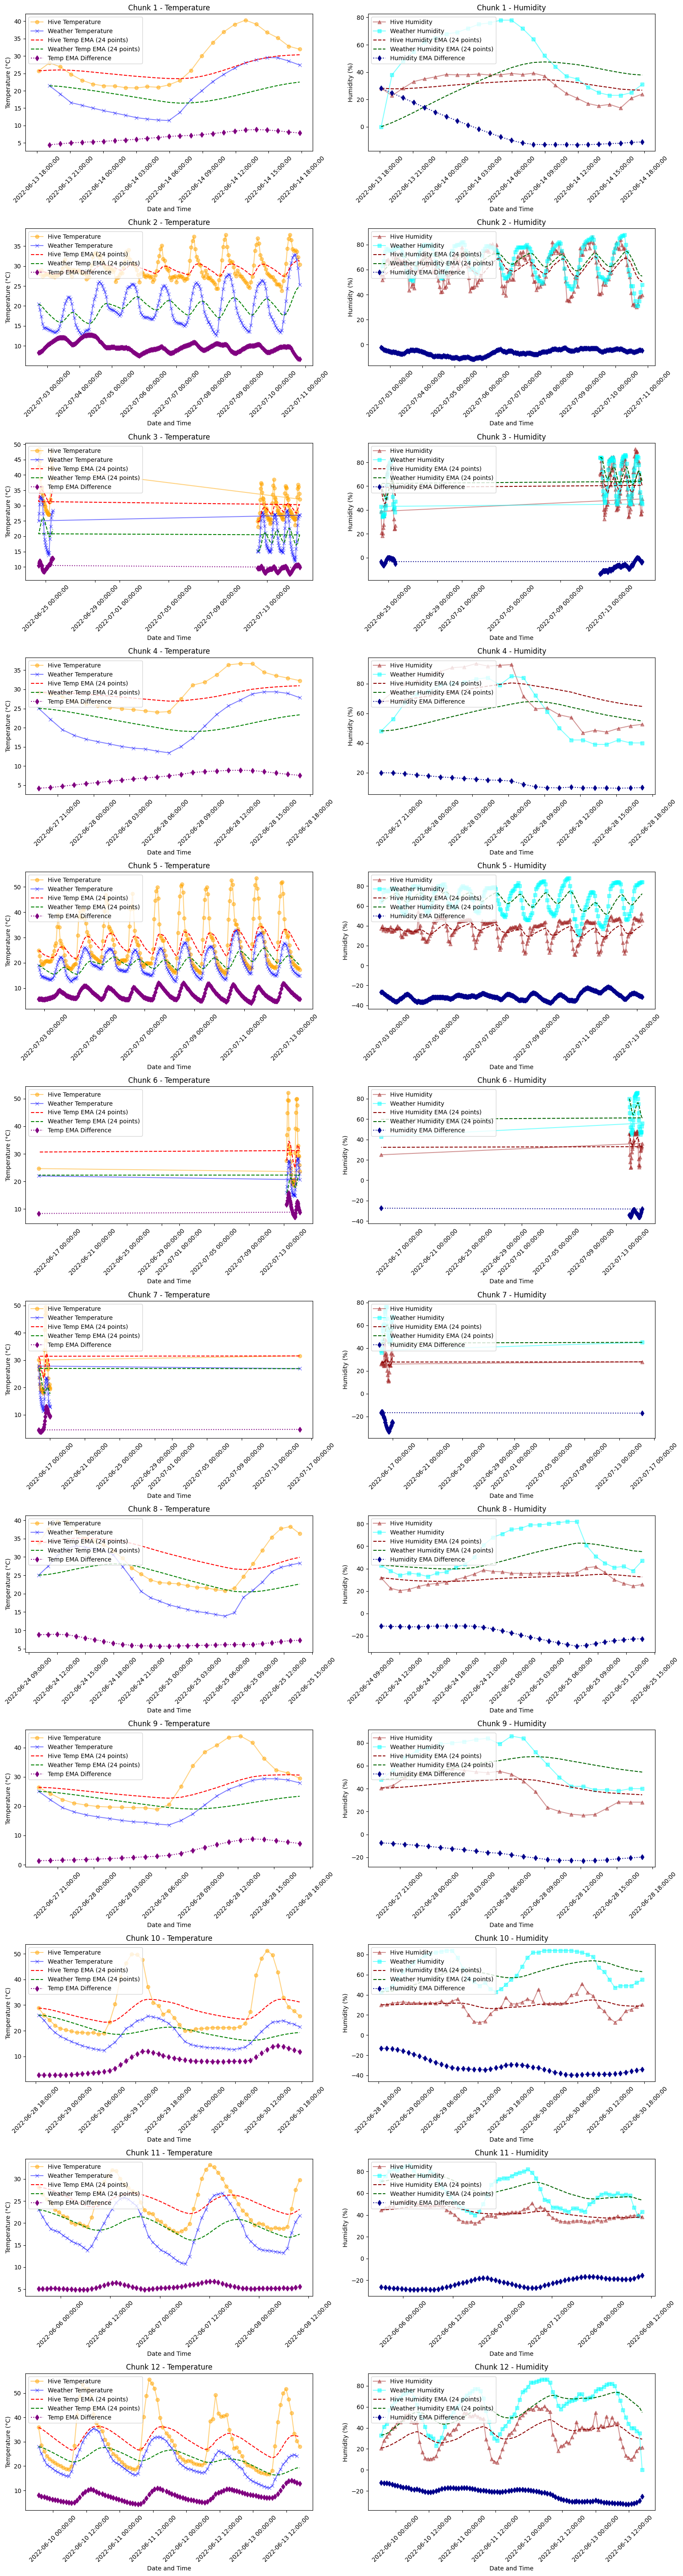

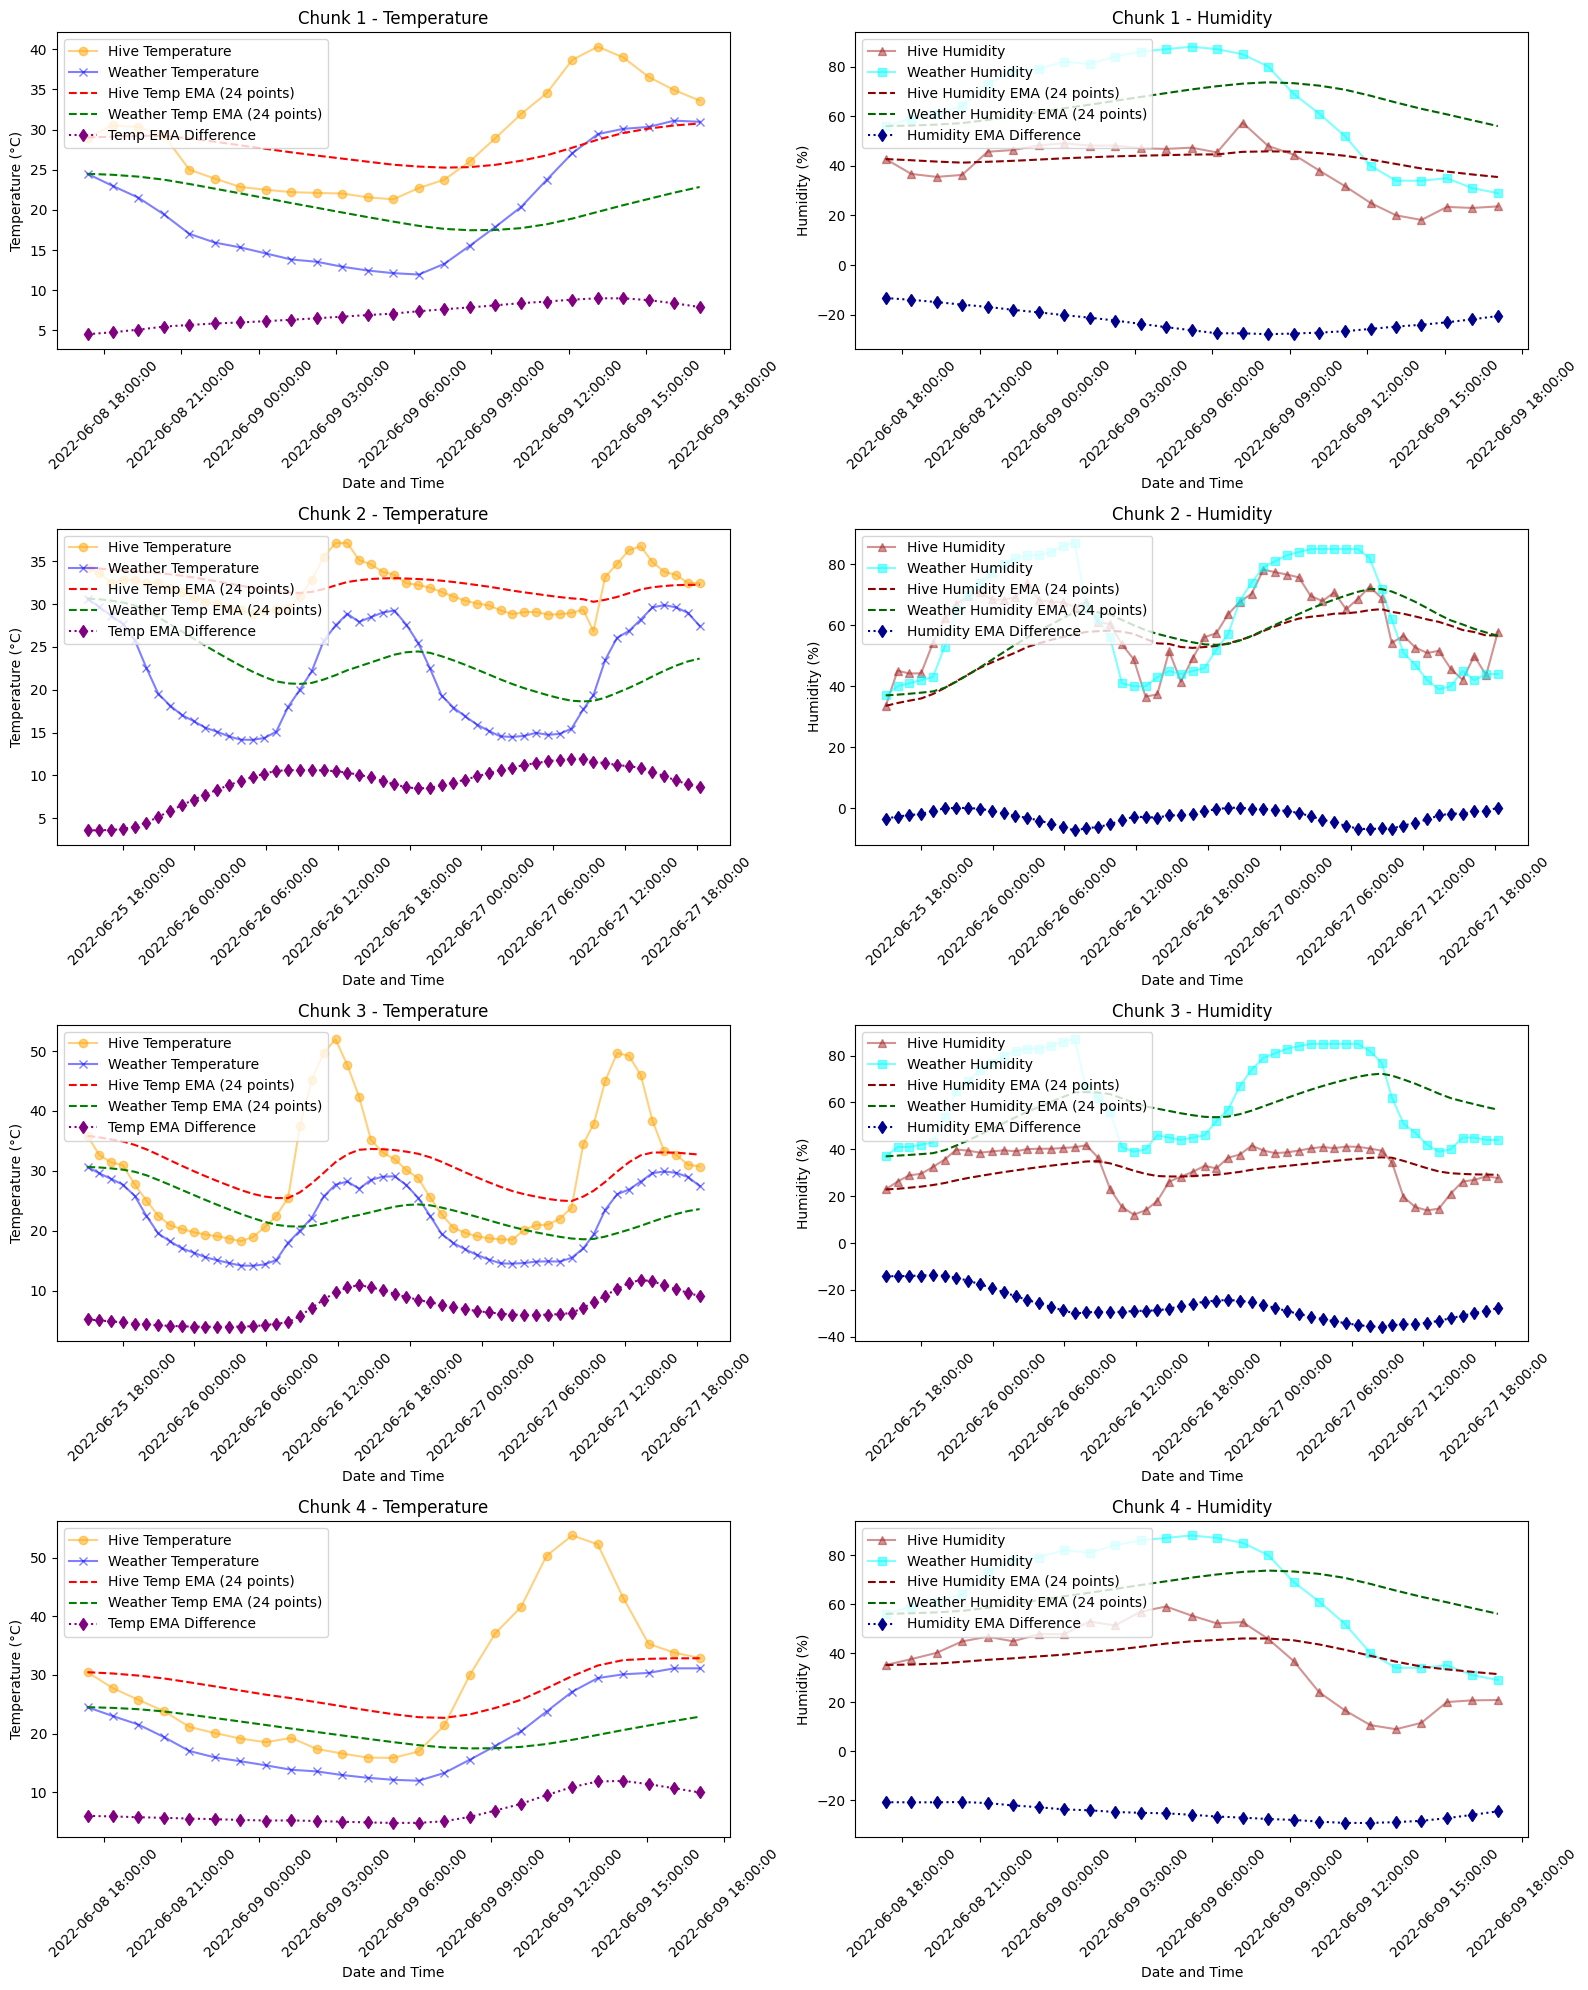

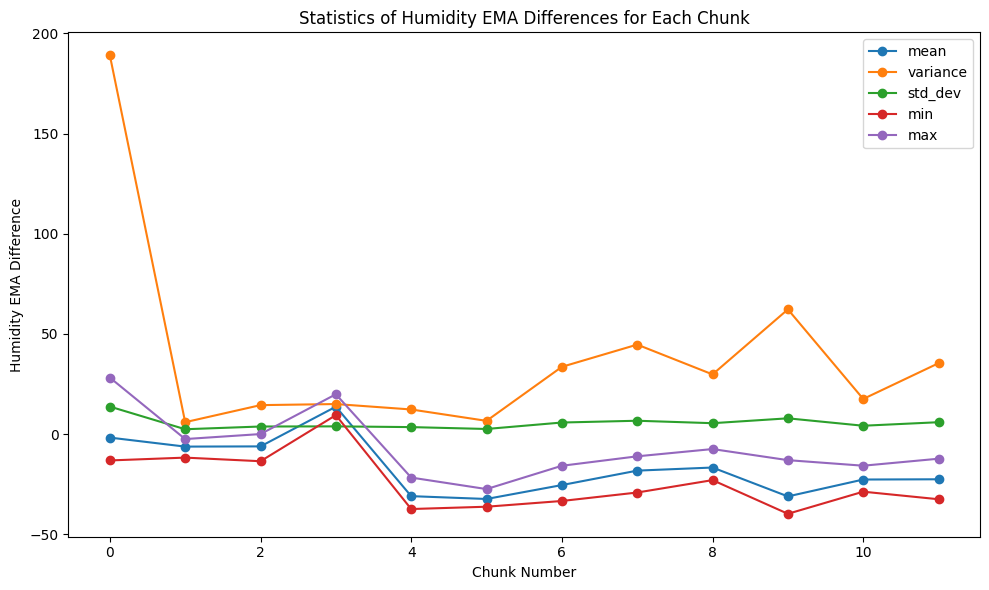

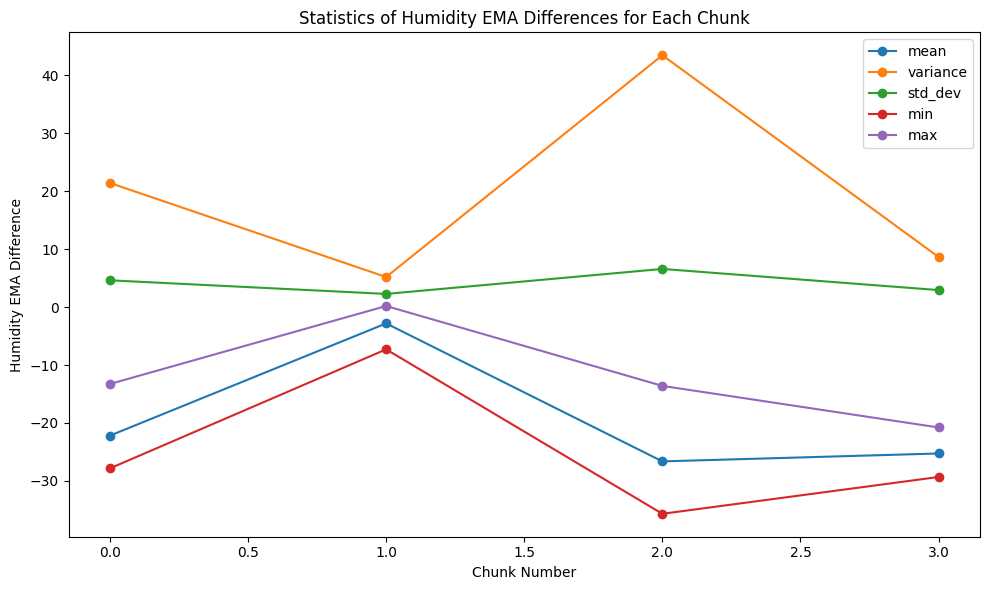

In [111]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

# Function to calculate statistical parameters for each chunk
def calculate_statistics(chunk, col):
    stats = {
        'mean': chunk[col].mean(),
        'variance': chunk[col].var(),
        'std_dev': chunk[col].std(),
        'min': chunk[col].min(),
        'max': chunk[col].max()
    }
    return stats

# Define a function to plot temperature and humidity for each chunk
def plot_chunk_data(chunks):
    n_chunks = len(chunks)
    fig, axes = plt.subplots(n_chunks, 2, figsize=(16, 5 * n_chunks))  # 2 plots per row (temperature and humidity)

    # Store statistics for each chunk
    temp_stats = []
    humidity_stats = []

    for i, chunk in enumerate(chunks):
        # Calculate EMAs for temperature and humidity
        chunk['hive_temp_ema'] = chunk['hive temp'].ewm(span=24, adjust=False).mean()
        chunk['weather_temp_ema'] = chunk['weather temp'].ewm(span=24, adjust=False).mean()
        chunk['temp_ema_difference'] = chunk['hive_temp_ema'] - chunk['weather_temp_ema']

        chunk['hive_humidity_ema'] = chunk['hive humidity'].ewm(span=24, adjust=False).mean()
        chunk['weather_humidity_ema'] = chunk['weather humidity'].ewm(span=24, adjust=False).mean()
        chunk['humidity_ema_difference'] = chunk['hive_humidity_ema'] - chunk['weather_humidity_ema']

        # Plot Temperature Data for the chunk
        axes[i, 0].plot(chunk['date'], chunk['hive temp'], label='Hive Temperature', color='orange', marker='o', alpha=0.5)
        axes[i, 0].plot(chunk['date'], chunk['weather temp'], label='Weather Temperature', color='blue', marker='x', alpha=0.5)
        axes[i, 0].plot(chunk['date'], chunk['hive_temp_ema'], label='Hive Temp EMA (24 points)', color='red', linestyle='--')
        axes[i, 0].plot(chunk['date'], chunk['weather_temp_ema'], label='Weather Temp EMA (24 points)', color='green', linestyle='--')
        axes[i, 0].plot(chunk['date'], chunk['temp_ema_difference'], label='Temp EMA Difference', color='purple', linestyle=':', marker='d')
        axes[i, 0].set_title(f'Chunk {i+1} - Temperature')
        axes[i, 0].set_xlabel('Date and Time')
        axes[i, 0].set_ylabel('Temperature (°C)')
        axes[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        axes[i, 0].xaxis.set_major_locator(mdates.AutoDateLocator())
        axes[i, 0].legend(loc='upper left')
        axes[i, 0].tick_params(axis='x', rotation=45)

        # Plot Humidity Data for the chunk
        axes[i, 1].plot(chunk['date'], chunk['hive humidity'], label='Hive Humidity', color='brown', marker='^', alpha=0.5)
        axes[i, 1].plot(chunk['date'], chunk['weather humidity'], label='Weather Humidity', color='cyan', marker='s', alpha=0.5)
        axes[i, 1].plot(chunk['date'], chunk['hive_humidity_ema'], label='Hive Humidity EMA (24 points)', color='darkred', linestyle='--')
        axes[i, 1].plot(chunk['date'], chunk['weather_humidity_ema'], label='Weather Humidity EMA (24 points)', color='darkgreen', linestyle='--')
        axes[i, 1].plot(chunk['date'], chunk['humidity_ema_difference'], label='Humidity EMA Difference', color='darkblue', linestyle=':', marker='d')
        axes[i, 1].set_title(f'Chunk {i+1} - Humidity')
        axes[i, 1].set_xlabel('Date and Time')
        axes[i, 1].set_ylabel('Humidity (%)')
        axes[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        axes[i, 1].xaxis.set_major_locator(mdates.AutoDateLocator())
        axes[i, 1].legend(loc='upper left')
        axes[i, 1].tick_params(axis='x', rotation=45)

        # Collect stats for both temperature and humidity for each chunk
        temp_stats.append(calculate_statistics(chunk, 'temp_ema_difference'))
        humidity_stats.append(calculate_statistics(chunk, 'humidity_ema_difference'))

    plt.tight_layout()
    plt.show()

    return temp_stats, humidity_stats


# Function to plot statistics for all chunks
def plot_statistics(stats, label):
    fig, ax = plt.subplots(figsize=(10, 6))
    stats_df = pd.DataFrame(stats)

    # Plot each statistic as a separate line on the plot
    for col in stats_df.columns:
        ax.plot(stats_df.index, stats_df[col], marker='o', label=col)

    ax.set_title(f'Statistics of {label} EMA Differences for Each Chunk')
    ax.set_xlabel('Chunk Number')
    ax.set_ylabel(f'{label} EMA Difference')
    ax.legend()
    plt.tight_layout()
    plt.show()


# Assuming chunks is the list of all data chunks and each has the required columns
temp_stats_with_queen, humidity_stats_with_queen = plot_chunk_data(chunks_queen_presence)
temp_stats_no_queen, humidity_stats_no_queen = plot_chunk_data(chunks_no_queen_presence)


plot_statistics(temp_stats_with_queen, 'Temperature')
plot_statistics(humidity_stats_with_queen, 'Humidity')
plot_statistics(temp_stats_no_queen, 'Temperature')
plot_statistics(humidity_stats_no_queen, 'Humidity')


In [131]:
chunk  = chunks_no_queen_presence[1]
print(f"Chunk has {len(chunk)} rows")
total_rows = len(chunk)
sliding_window = 24
count = 0
for i in range(0,total_rows-sliding_window+1):
    count +=1
print(f"Total number of sliding windows: {count}")

T_OPTIMAL_LOW = 32  # lower bound of optimal temp
T_OPTIMAL_HIGH = 35  # upper bound of optimal temp
H_OPTIMAL_LOW = 65  # lower bound of optimal humidity
H_OPTIMAL_HIGH = 75  # upper bound of optimal humidity

# Weights for temperature and humidity
W_T = 0.6  # weight for temperature
W_H = 0.4  # weight for humidity

# Penalty factors
P_T = 0.2  # penalty per degree Celsius deviation
P_H = 0.1  # penalty per percentage deviation

chunk['hive_temp_ema'] = chunk.ewm(span=24, adjust=False)['hive temp'].mean()
chunk['hive_humidity_ema'] = chunk.ewm(span=24, adjust=False)['hive humidity'].mean()

def calculate_health_score(row):
    # Extract values from the row
    T_internal = row['hive_temp_ema']
    H_internal = row['hive_humidity_ema']
    
    # Check if temperature is within optimal range
    if T_OPTIMAL_LOW <= T_internal <= T_OPTIMAL_HIGH:
        T_score = 1  # No deviation, full score
    else:
        # Calculate temperature deviation
        T_deviation = max(0, abs(T_internal - T_OPTIMAL_LOW) if T_internal < T_OPTIMAL_LOW else abs(T_internal - T_OPTIMAL_HIGH))
        T_score = max(0, 1 - T_deviation * P_T)  
    
    # Check if humidity is within optimal range
    if H_OPTIMAL_LOW <= H_internal <= H_OPTIMAL_HIGH:
        H_score = 1  # No deviation, full score
    else:
        # Calculate humidity deviation
        H_deviation = max(0, abs(H_internal - H_OPTIMAL_LOW) if H_internal < H_OPTIMAL_LOW else abs(H_internal - H_OPTIMAL_HIGH))
        H_score = max(0, 1 - H_deviation * P_H)  # Apply penalty
    
    # Final health score
    health_score = (T_score * W_T) + (H_score * W_H)
    
    return health_score

chunk['health_score'] = chunk.apply(calculate_health_score, axis=1)

import matplotlib.pyplot as plt

# Plot health scores over time
plt.figure(figsize=(10, 8))

# Subplot 1: Hive temperature with optimal range lines
plt.subplot(3, 1, 1)
plt.plot(chunk['date'], chunk['hive temp'], label='Hive Temperature', color='orange')
plt.axhline(y=T_OPTIMAL_LOW, color='green', linestyle='--', label='Optimal Temp Low (32°C)')
plt.axhline(y=T_OPTIMAL_HIGH, color='green', linestyle='--', label='Optimal Temp High (35°C)')
plt.title('Hive Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Subplot 2: Hive humidity with optimal range lines
plt.subplot(3, 1, 2)
plt.plot(chunk['date'], chunk['hive humidity'], label='Hive Humidity', color='blue')
plt.axhline(y=H_OPTIMAL_LOW, color='red', linestyle='--', label='Optimal Humidity Low (65%)')
plt.axhline(y=H_OPTIMAL_HIGH, color='red', linestyle='--', label='Optimal Humidity High (75%)')
plt.title('Hive Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()

# Subplot 3: Health score over time
plt.subplot(3, 1, 3)
plt.plot(chunk['date'], chunk['health_score'], label='Health Score', color='purple',scaley=True)
plt.title('Health Score Over Time')
plt.xlabel('Date')
plt.ylabel('Health Score')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Chunk has 53 rows
Total number of sliding windows: 30


In [150]:
chunk = chunks_no_queen_presence[1]

# Print the column names to verify the correct names
print("Columns in chunk:", chunk.columns)

# Select only the necessary numeric columns for health score calculation
chunk_numeric = chunk[['hive temp', 'hive humidity']].copy()

# Define optimal temperature and humidity ranges
T_OPTIMAL_LOW = 32  # lower bound of optimal temp
T_OPTIMAL_HIGH = 35  # upper bound of optimal temp
H_OPTIMAL_LOW = 65  # lower bound of optimal humidity
H_OPTIMAL_HIGH = 75  # upper bound of optimal humidity

# Define weights
W_T = 0.6  # weight for temperature
W_H = 0.4  # weight for humidity

# Function to calculate the health score for a 24-hour window
def calculate_health_score_24h_window(window):
    # Extract temperature and humidity values for the 24-hour period
    temp_values = window['hive temp']  # Use single brackets to get a Series
    humidity_values = window['hive humidity']  # Use single brackets to get a Series
    
    # Calculate the percentage of time temperature is within the optimal range
    temp_within_range = ((temp_values >= T_OPTIMAL_LOW) & (temp_values <= T_OPTIMAL_HIGH)).sum() / len(temp_values)
    
    # Calculate the percentage of time humidity is within the optimal range
    humidity_within_range = ((humidity_values >= H_OPTIMAL_LOW) & (humidity_values <= H_OPTIMAL_HIGH)).sum() / len(humidity_values)
    
    # Calculate the final health score using weights
    health_score = (temp_within_range * W_T) + (humidity_within_range * W_H)
    print(health_score)
    return health_score

# Use rolling window of 24 hours to calculate the health score
# Ensure that the rolling is applied correctly on the numeric DataFrame
chunk['health_score'] = chunk_numeric.rolling(window=24, min_periods=24).apply(calculate_health_score_24h_window)
# Drop any NaN values resulting from incomplete windows
chunk.dropna(subset=['health_score'], inplace=True)

# Plot the health score over time
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
plt.plot(chunk['date'], chunk['health_score'], label='Health Score', color='purple')
plt.title('Health Score Over Time (24-hour Window)')
plt.xlabel('Date')
plt.ylabel('Health Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)  # Add grid for easier interpretation of the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

Columns in chunk: Index(['date', 'device', 'hive number', 'hive humidity', 'hive temp',
       'weather temp', 'weather humidity', 'queen presence', 'day', 'time',
       'health_score', 'hive_temp_ema', 'hive_humidity_ema'],
      dtype='object')


KeyError: 'hive temp'

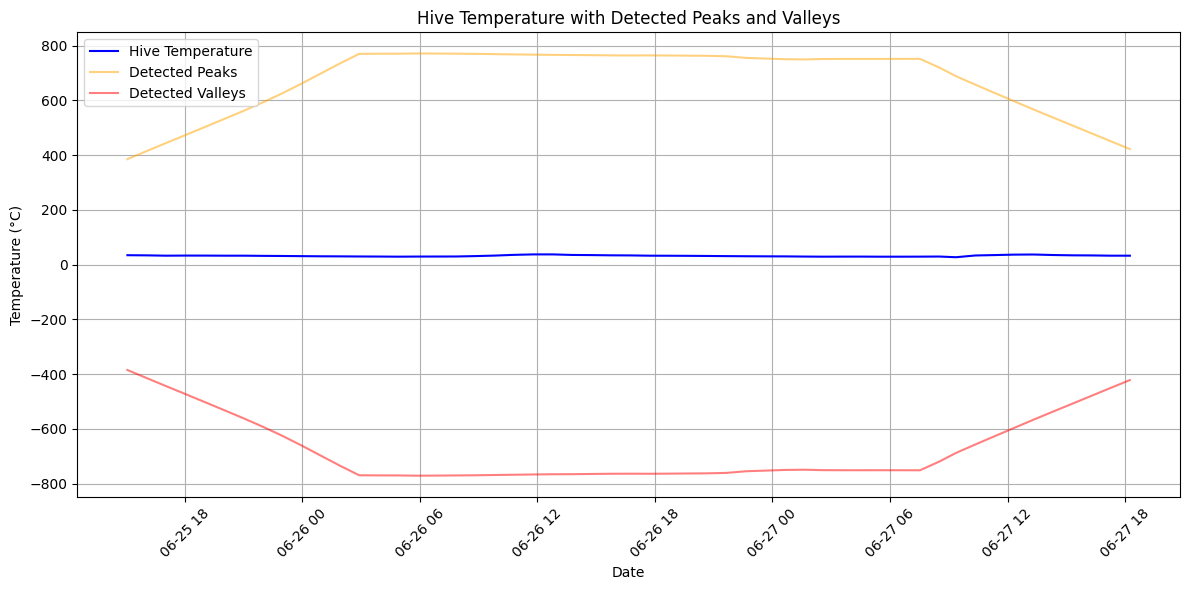

In [151]:
# Simulated data: replace this with your actual temperature data
# Assuming chunk['hive temp'] is the series you're working with
data = chunk['hive temp']
reference_temp = 33.5  # Reference temperature

# Calculate deviations from the reference temperature
deviation = data - reference_temp

# Define thresholds for peaks and lows
peak_threshold = 1.0  # Temperature above reference to be considered a peak
low_threshold = -1.0   # Temperature below reference to be considered a low

# Identify peaks and lows based on the deviation
peaks = (deviation > peak_threshold).astype(int)
lows = (deviation < low_threshold).astype(int)

# Optionally, smooth the data to reduce noise
window_size = 3  # Size of the smoothing window
smoothed_data = data.rolling(window=window_size, center=True).mean()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(chunk['date'], smoothed_data, label='Smoothed Hive Temperature', color='blue', alpha=0.7)
plt.axhline(y=reference_temp, color='green', linestyle='--', label='Reference Temperature (33.5°C)')
plt.scatter(chunk['date'][peaks == 1], data[peaks == 1], color='orange', label='Peaks', zorder=5)
plt.scatter(chunk['date'][lows == 1], data[lows == 1], color='red', label='Lows', zorder=5)
plt.title('Hive Temperature with Detected Peaks and Lows')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()